<h1 align='center'>Internet privacy poll</h1>

<img src='https://atlassociety.org/sites/default/files/internet-privacy_0.jpg'/>

Internet privacy has gained widespread attention in recent years. To measure the degree to which people are concerned about hot-button issues like Internet privacy, social scientists conduct polls in which they interview a large number of people about the topic. In this assignment, we will analyze data from a July 2013 Pew Internet and American Life Project poll on Internet anonymity and privacy, which involved interviews across the United States. While the full polling data can be found here, we will use a more limited version of the results, available in data/AnonymityPoll.csv. The dataset has the following fields (all Internet use-related fields were only collected from interviewees who either use the Internet or have a smartphone):

**Internet.Use**: A binary variable indicating if the interviewee uses the Internet, at least occasionally (equals 1 if the interviewee uses the Internet, and equals 0 if the interviewee does not use the Internet).

**Smartphone**: A binary variable indicating if the interviewee has a smartphone (equals 1 if they do have a smartphone, and equals 0 if they don't have a smartphone).

**Sex**: Male or Female.

**Age**: Age in years.

**State**: State of residence of the interviewee.

**Region**: Census region of the interviewee (Midwest, Northeast, South, or West).

**Conservativeness**: Self-described level of conservativeness of interviewee, from 1 (very liberal) to 5 (very conservative).

**Info.On.Internet**: Number of the following items this interviewee believes to be available on the Internet for others to see: 

* (1) Their email address
* (2) Their home address
* (3) Their home phone number
* (4) Their cell phone number
* (5) The employer/company they work for
* (6) Their political party or political affiliation
* (7) Things they've written that have their name on it
* (8) A photo of them
* (9) A video of them
* (10) Which groups or organizations they belong to
* (11) Their birth date.

**Worry.About.Info**: A binary variable indicating if the interviewee worries about how much information is available about them on the Internet (equals 1 if they worry, and equals 0 if they don't worry).

**Privacy.Importance**: A score from 0 (privacy is not too important) to 100 (privacy is very important), which combines the degree to which they find privacy important in the following:
* (1) The websites they browse
* (2) Knowledge of the place they are located when they use the Internet
* (3) The content and files they download
* (4) The times of day they are online
* (5) The applications or programs they use; (6) The searches they perform; (7) The content of their email; (8) The people they exchange email with; and (9) The content of their online chats or hangouts with others.

**Anonymity.Possible**: A binary variable indicating if the interviewee thinks it's possible to use the Internet anonymously, meaning in such a way that online activities can't be traced back to them (equals 1 if he/she believes you can, and equals 0 if he/she believes you can't).

**Tried.Masking.Identity**: A binary variable indicating if the interviewee has ever tried to mask his/her identity when using the Internet (equals 1 if he/she has tried to mask his/her identity, and equals 0 if he/she has not tried to mask his/her identity).

**Privacy.Laws.Effective**: A binary variable indicating if the interviewee believes United States law provides reasonable privacy protection for Internet users (equals 1 if he/she believes it does, and equals 0 if he/she believes it doesn't).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

poll = pd.read_csv('data/AnonymityPoll.csv')

In [5]:
# 1 - How many people participated in the poll?

poll.shape

# ans: 1002

(1002, 13)

In [7]:
# 2 - Let's look at the breakdown of the number of people with smartphones

# 2.1 - How many interviewees responded that they use a smartphone?
# 2.2 - How many interviewees responded that they don't use a smartphone?
# 2.3 - How many interviewees did not respond to the question, resulting in a missing value?

print(poll.Smartphone.value_counts())
print(poll.Smartphone.isnull().sum())

# ans(2.1): 487     -
# ans(2.2): 472     -----> 487 + 472 + 43 == 1002 the total number of people participated 
# ans(2.3): 43      - 



1.0    487
0.0    472
Name: Smartphone, dtype: int64
43


In [12]:
# 3 - Which of the following are states in the Midwest census region?

poll.State[poll.Region == 'Midwest'].value_counts()

Ohio            38
Illinois        32
Michigan        31
Indiana         27
Missouri        26
Wisconsin       23
Minnesota       15
Kansas          14
Iowa            14
Nebraska        11
North Dakota     5
South Dakota     3
Name: State, dtype: int64

In [46]:
# 4.1 - How many interviewees reported not having used the Internet and not having used a smartphone?
# 4.2 - How many interviewees reported having used the Internet and having used a smartphone?
# 4.3 - How many interviewees reported having used the Internet but not having used a smartphone?
# 4.4 - How many interviewees reported having used a smartphone but not having used the Internet?


print(poll.Smartphone[ (poll.Smartphone == 0) & (poll['Internet.Use'] == 0) ].count())
print(poll.Smartphone[ (poll.Smartphone == 1) & (poll['Internet.Use'] == 1) ].count())
print(poll.Smartphone[ (poll.Smartphone == 0) & (poll['Internet.Use'] == 1) ].count())
print(poll.Smartphone[ (poll.Smartphone == 1) & (poll['Internet.Use'] == 0) ].count())

186
470
285
17


In [48]:
# 5.1 - How many interviewees have a missing value for their Internet use?
# 5.2 - How many interviewees have a missing value for their smartphone use?

print(poll['Internet.Use'].isnull().sum())
print(poll.Smartphone.isnull().sum())

1
43


In [54]:
# 6 - Create a subset of the poll dataframe called "limited", which is limited to interviewees who reported
# Internet use or who reported smartphone use.
# In lecture, we used the & symbol to use two criteria to make a subset of the data.
# To only take observations that have a certain value in 
# one variable or the other, the | character can be used in place of the & symbol.
# This is also called a logical "or" operation.


# How many interviewees are in the new data frame?

limited = poll[(poll['Internet.Use'] == 1) | poll.Smartphone == 1]

print(limited.shape)
limited.head()

(792, 13)


,Internet.Use,Smartphone,Sex,Age,State,Region,Conservativeness,Info.On.Internet,Worry.About.Info,Privacy.Importance,Anonymity.Possible,Tried.Masking.Identity,Privacy.Laws.Effective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,0.0,1.0,Female,70.0,New Jersey,Northeast,4.0,0.0,0.0,NaN,0.0,0.0,NaN
3,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
5,1.0,1.0,Male,49.0,Tennessee,South,4.0,6.0,0.0,88.888889,1.0,1.0,0.0


## For the rest of the questions, limited dataframe shall be used to answer the questions

In [55]:
# 7 - Which variables have missing values in the limited data frame?

limited.isnull().sum()

# ans: Smartphone, Age, Conservativeness, Anonymity.Possible, Worry.About.Info, 
#      Tried.Masking.Identity and Privacy.Laws.Effective

Internet.Use               0
Smartphone                20
Sex                        0
Age                       22
State                      0
Region                     0
Conservativeness          45
Info.On.Internet           0
Worry.About.Info           2
Privacy.Importance         5
Anonymity.Possible        39
Tried.Masking.Identity     8
Privacy.Laws.Effective    65
dtype: int64

In [78]:
# 8 - What is the average number of pieces of personal information on the Internet,
#     according to the Info.On.Internet variable?

limited['Info.On.Internet'].describe()  # Look at the mean
limited['Info.On.Internet'].mean()

3.7954545454545454

In [79]:
# 9.1 - How many interviewees reported a value of 0 for Info.On.Internet?
# 9.2 - How many interviewees reported the maximum value of 11 for Info.On.Internet?


limited['Info.On.Internet'].value_counts()

# ans(9.1): 105
# ans(9.2): 8

0.0     105
4.0     104
3.0     101
2.0      95
5.0      94
1.0      84
6.0      67
7.0      63
8.0      40
9.0      18
10.0     13
11.0      8
Name: Info.On.Internet, dtype: int64

In [80]:
# 10 - What proportion of interviewees who answered the Worry.About.Info question worry about how much information
#      is available about them on the Internet? Note that to compute this proportion you will be dividing
#      by the number of people who answered the Worry.About.Info question,
#      not the total number of people in the data frame.

they_worry = limited['Worry.About.Info'].value_counts()[1]
they_worry / limited['Worry.About.Info'].count()

# ans: 0.489

0.48860759493670886

In [81]:
# 11 - What proportion of interviewees who answered the Anonymity, 
#      think it is possible to be completely anonymous on the Internet?

limited['Anonymity.Possible'].value_counts()[1] / limited['Anonymity.Possible'].count()

# ans: 0.369

0.36918990703851262

In [82]:
# 12 - What proportion of interviewees who answered the Tried.Masking.Identity question have tried masking
#      their identity on the Internet?

limited['Tried.Masking.Identity'].value_counts()[1] / limited['Tried.Masking.Identity'].count()

# ans: 0.163

0.16326530612244897

In [83]:
# 13 - What proportion of interviewees who answered the Privacy.Laws.Effective question, 
#      find United States privacy laws effective?

limited['Privacy.Laws.Effective'].value_counts()[1] / limited['Privacy.Laws.Effective'].count()

0.25584594222833562

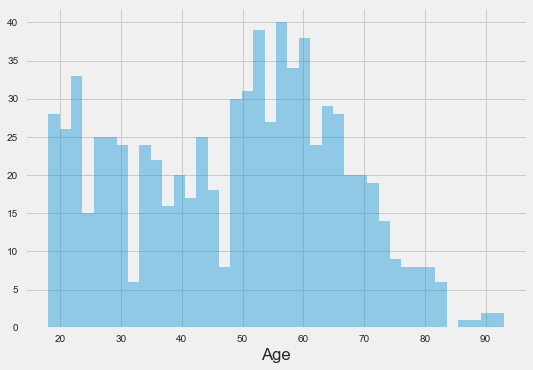

In [96]:
# 14 - Often, we are interested in whether certain characteristics of interviewees
#      (e.g. their age or political opinions) affect their opinions on the topic of the poll
#      (in this case, opinions on privacy).
#      In this section, we will investigate the relationship between the characteristics Age and Smartphone
#      and outcome variables Info.On.Internet and Tried.Masking.Identity,
#      again using the limited data frame we built in an earlier section of this problem.

#      Build a histogram of the age of interviewees. What is the best represented age group in the population?

age = limited.Age[~limited.Age.isnull()]  # remove the nulls so that I can draw histogram
sns.distplot(age, kde=False, bins=40)
sns.plt.show()

# ans: people about 60 years old

In [123]:
# 15 - What is the average Info.On.Internet value for smartphone users?
# 16 - What is the average Info.On.Internet value for non-smartphone users?


limited[limited.Smartphone == 0]['Info.On.Internet'].describe()

# ans(15): 4.368
# ans(16): 2.923

count    285.000000
mean       2.922807
std        2.449707
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       11.000000
Name: Info.On.Internet, dtype: float64

In [161]:
# 17 - What proportion of smartphone users who answered the Tried.Masking.Identity question have tried
#      masking their identity when using the Internet?


maskers = limited[ (limited.Smartphone == 1) & (limited['Tried.Masking.Identity'] == 1)].shape[0]  # no. of obs
non_maskers = len(limited[ (limited.Smartphone == 1) & (limited['Tried.Masking.Identity'] == 0)] )

print(maskers / (maskers + non_maskers))


# ans: 0.193

0.19254658385093168


In [165]:
# 18 - What proportion of non-smartphone users who answered the Tried.Masking.Identity question have tried
#      masking their identity when using the Internet?

xx = limited[ (limited.Smartphone == 0) & (limited['Tried.Masking.Identity'] == 1) ].shape[0]
yy = limited[ (limited.Smartphone == 0) & (limited['Tried.Masking.Identity'] == 0)].shape[0]

print(xx / (xx + yy))

# ans: 0.117

0.11743772241992882
